# Validation 
### <i> User generated validation dataset assessment

In [17]:
import pandas as pd
import pickle
from numpy import nan
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import auc

In [18]:
#pull in validation dataset
outvalid = pd.read_csv('test_data/validation_done_mainsmore.csv')
#This data was generated with the help of some very kind friends who tagged 500 ingredients as either good or bad replacements

In [19]:
outvalid

,title,OG Ingredient,Swapped Ingredient,aisle,Cosine Sim,good?
0,Italian-Style Eggplant Parmesan (Melanzane all...,vegetable oil,olive oil,"oil, vinegar, salad dressing",0.218312,yes
1,Italian-Style Eggplant Parmesan (Melanzane all...,eggplant,parsley,produce,0.078925,no
2,Italian-Style Eggplant Parmesan (Melanzane all...,mozzarella,cheese,cheese,0.218312,yes
3,"Easy Chicken, Kale and Goat Cheese Enchiladas",avocado oil,olive oil,"oil, vinegar, salad dressing",0.192600,yes
4,"Slow Cooker Chicken with Rosemary, Apples and ...",apple,leaf lard,produce,0.134471,no
...,...,...,...,...,...,...
895,Almond & Herb Crusted Salmon,juice lemon,arugula,produce,0.146662,NaN
896,Mexican Street Corn Tostadas,bean,corn,produce,0.031119,NaN
897,Mexican Street Corn Tostadas,vegetable oil,olive oil,"oil, vinegar, salad dressing",0.133223,NaN
898,Mexican Street Corn Tostadas,juice lime,cilantro,produce,0.114483,NaN


In [62]:
#output some facts
allmat = (outvalid[outvalid['good?'].notnull()])
allmat = outvalid[outvalid['aisle'].str.contains('produce')]
print(f'All matrix is {allmat.shape}')
print(f'Average recipe similarity is {allmat["Cosine Sim"].mean()} +- {allmat["Cosine Sim"].std()}, median is {allmat["Cosine Sim"].median()} ')
print('\n')

good = allmat[allmat['good?'].str.match('yes', na=False)]
print(f'Good matrix is {good.shape}')
print(f'Average recipe similarity of good replacements is {good["Cosine Sim"].mean()} +- {good["Cosine Sim"].std()}, median is {good["Cosine Sim"].median()}')
print('\n')

bad = allmat[allmat['good?'].str.match('no', na=False)]
print(f'Bad matrix is {bad.shape}')
print(f'Average recipe similarity of bad replacements is {bad["Cosine Sim"].mean()} +- {bad["Cosine Sim"].std()}, median is {bad["Cosine Sim"].median()}')


All matrix is (484, 6)
Average recipe similarity is 0.22399886313790499 +- 0.13380710904334714, median is 0.1909765031 


Good matrix is (70, 6)
Average recipe similarity of good replacements is 0.32142843124028575 +- 0.1129561083553281, median is 0.29559777185


Bad matrix is (195, 6)
Average recipe similarity of bad replacements is 0.1756186241551077 +- 0.10610623459710342, median is 0.1502419855


In [63]:
#generate some statistics
threshold = np.arange(0.01, 0.72, 0.01)
results = pd.DataFrame()


for i, cutoff in enumerate(threshold):
    results.loc[i, 'threshold'] =  cutoff
    
    #elements on confusion matrix
    results.loc[i, 'TP'] = len(good[good["Cosine Sim"] >= cutoff])
    results.loc[i, 'FP'] = len(bad[bad["Cosine Sim"] >= cutoff])
    results.loc[i, 'TN'] = len(bad[bad["Cosine Sim"] <= cutoff])
    results.loc[i, 'FN'] = len(good[good["Cosine Sim"] <= cutoff])
    
    # precision and recall
    results.loc[i, 'recall'] = results.loc[i, 'TP'] / (results.loc[i, 'TP'] + results.loc[i, 'FN'] )
    results.loc[i, 'precision'] = results.loc[i, 'TP'] / ( results.loc[i, 'TP'] + results.loc[i, 'FP'] )
    
    #ROC
    results.loc[i, 'f1'] = 2 * (results.loc[i, 'precision'] * results.loc[i, 'recall']) / (results.loc[i, 'precision'] + results.loc[i, 'recall'])
    results.loc[i, 'TPR'] = results.loc[i, 'TP'] / (results.loc[i, 'TP'] + results.loc[i, 'FN'] )
    results.loc[i, 'FPR'] = results.loc[i, 'FP'] / (results.loc[i, 'FP'] + results.loc[i, 'TN'] )
 

/opt/anaconda3/envs/insight/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in double_scalars


In [64]:
results

,threshold,TP,FP,TN,FN,recall,precision,f1,TPR,FPR
0,0.01,70.0,194.0,1.0,0.0,1.0,0.265152,0.419162,1.0,0.994872
1,0.02,70.0,193.0,2.0,0.0,1.0,0.266160,0.420420,1.0,0.989744
2,0.03,70.0,191.0,4.0,0.0,1.0,0.268199,0.422961,1.0,0.979487
3,0.04,70.0,191.0,4.0,0.0,1.0,0.268199,0.422961,1.0,0.979487
4,0.05,70.0,189.0,6.0,0.0,1.0,0.270270,0.425532,1.0,0.969231
...,...,...,...,...,...,...,...,...,...,...
66,0.67,0.0,0.0,195.0,70.0,0.0,NaN,NaN,0.0,0.000000
67,0.68,0.0,0.0,195.0,70.0,0.0,NaN,NaN,0.0,0.000000
68,0.69,0.0,0.0,195.0,70.0,0.0,NaN,NaN,0.0,0.000000
69,0.70,0.0,0.0,195.0,70.0,0.0,NaN,NaN,0.0,0.000000


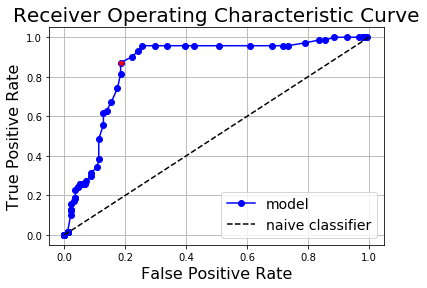

In [65]:
#ROC plot
plt.style.use('seaborn-dark-palette')
thresholds = [str(t) for t in results['threshold']]
plt.plot(results['FPR'], results['TPR'], 'bo-', label = 'model');
plt.plot(list(np.linspace(0, 1, num = len(threshold))), list(np.linspace(0, 1, num = len(threshold))), 'k--', label = 'naive classifier');


plt.legend(prop={'size':14})
plt.ylabel('True Positive Rate', size = 16); plt.xlabel('False Positive Rate', size = 16);
plt.title('Receiver Operating Characteristic Curve', size = 20);
best = results[['f1']].idxmax()
plt.grid(True)
plt.plot(results.loc[best[0], 'FPR'], results.loc[best[0], 'TPR'], '*r')

In [67]:
results.loc[best]

,threshold,TP,FP,TN,FN,recall,precision,f1,TPR,FPR
22,0.23,61.0,36.0,159.0,9.0,0.871429,0.628866,0.730539,0.871429,0.184615


In [68]:
theauc = auc(results['FPR'].to_numpy(), results['TPR'].to_numpy())
print(f'Area under curve: {theauc}')

Area under curve: 0.8517216117216118


In [55]:
allmat.aisle.unique()

array(['oil, vinegar, salad dressing', 'produce', 'cheese',
       'refrigerated', 'milk, eggs, other dairy', 'alcoholic beverages',
       'ethnic foods', 'bakery/bread', 'pasta and rice',
       'canned and jarred', 'meat', 'seafood', 'empty',
       'nut butters, jams, and honey', 'health foods', 'dried fruits'],
      dtype=object)